In [28]:
!conda install -y pymysql

Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [29]:
import pymysql
import pandas as pd

In [30]:
db_config={
    "host":"localhost",
    "user":"root",
    "password":"Aggarwal@5117",
    "database":"sales"
}

In [31]:
queries = {
    "question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail" :
        """SELECT
            DATE_FORMAT(order_date, '%m') AS Month_ID,
            DATE_FORMAT(order_date, '%M') AS Month,
            DATE_FORMAT(order_date, '%Y') AS Year,
            SUM(after_discount) AS total_transaction
        FROM order_detail
        WHERE YEAR(order_date) = 2021 
          AND is_valid = 1
        GROUP BY Month_ID, Month, Year
        ORDER BY total_transaction DESC;
    """,
    "question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail" :
    """
        SELECT
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            skudet.category,
            SUM(ordet.after_discount) AS total_transaction
        FROM
            order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE
            ordet.is_valid = 1 
            AND DATE_FORMAT(ordet.order_date, '%Y') = '2022'
        GROUP BY
            DATE_FORMAT(ordet.order_date, '%Y'),
            skudet.category
        ORDER BY
            total_transaction DESC;
    """,
    "question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail":
    """
        WITH final_table AS (
            SELECT
                skudet.category,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
            FROM order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE ordet.is_valid = 1
            GROUP BY skudet.category
        )
        SELECT *, (transaction_2022 - transaction_2021) AS delta,
        CASE WHEN transaction_2022 > transaction_2021 THEN 'INCREASE' ELSE 'DECREASE' END AS remark
        FROM final_table;
    """,
    "question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail" :
    """
        SELECT
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            COUNT(DISTINCT ordet.id) AS freq
        FROM
            order_detail AS ordet
        JOIN
            payment_detail AS paydet ON ordet.payment_id = paydet.id
        WHERE
            ordet.is_valid = 1 
            AND YEAR(ordet.order_date) = 2022
        GROUP BY
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y')
        ORDER BY
            freq DESC
        LIMIT 5;
    """,
    "question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data." :
    """
        WITH final_table AS (
            SELECT
                CASE
                    WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
                    WHEN LOWER(skudet.sku_name) LIKE '%apple%' 
                         OR LOWER(skudet.sku_name) LIKE '%iphone%' 
                         OR LOWER(skudet.sku_name) LIKE '%macbook%' THEN 'Apple'
                    WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
                    WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
                    WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
                END AS product_brand,
                SUM(ordet.after_discount) AS total_transaction
            FROM
                order_detail AS ordet
            JOIN
                sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE
                ordet.is_valid = 1
            GROUP BY
                product_brand
        )
        SELECT *
        FROM final_table
        WHERE product_brand IS NOT NULL
        ORDER BY total_transaction DESC;
    """
}

In [32]:
from IPython.display import display

In [33]:
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")
    
    # Execute each query and display results
    for question, query in queries.items():
        print(f"\n--- {question} ---")
        df = pd.read_sql(query, connection)
        display(df)  # Display the DataFrame in the notebook
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!

--- question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



--- question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,year,category,total_transaction
0,2022,Mobiles & Tablets,9.128256e+08
1,2022,Entertainment,3.611392e+08
2,2022,Appliances,3.095840e+08
3,2022,Computing,2.124082e+08
4,2022,Men Fashion,1.333326e+08
5,2022,Women Fashion,9.023613e+07
6,2022,Home & Living,7.865896e+07
7,2022,Health & Sports,5.200838e+07
8,2022,Beauty & Grooming,4.559842e+07
9,2022,Superstore,3.264327e+07



--- question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,transaction_2021,transaction_2022,delta,remark
0,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,INCREASE
1,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,INCREASE
2,Computing,1.728789e+08,2.124082e+08,3.952934e+07,INCREASE
3,School & Education,1.138840e+07,1.730505e+07,5.916641e+06,INCREASE
4,Women Fashion,8.404596e+07,9.023613e+07,6.190171e+06,INCREASE
5,Superstore,2.861523e+07,3.264327e+07,4.028039e+06,INCREASE
6,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,INCREASE
7,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,INCREASE
8,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,INCREASE
9,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,INCREASE



--- question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,payment_method,year,freq
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



--- question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data. ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.448554e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


Database connection closed.


In [34]:
import os

In [35]:
db_config={
    "host":"localhost",
    "user":"root",
    "password":"Aggarwal@5117",
    "database":"sales"
}

In [165]:
# Folder path to save CSV files


output_folder = r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS"  # Replace with your folder path
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

In [166]:
tables = ["order_detail", "sku_detail", "payment_detail","customer_detail"]

In [169]:
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # SQL query to fetch all data from the table
        query = f"SELECT * FROM {table};"
        
        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!
Exporting table: order_detail


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\1590211234.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table order_detail exported successfully to C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\order_detail.csv.
Exporting table: sku_detail
Table sku_detail exported successfully to C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\sku_detail.csv.
Exporting table: payment_detail
Table payment_detail exported successfully to C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\payment_detail.csv.
Exporting table: customer_detail
Table customer_detail exported successfully to C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\customer_detail.csv.
Database connection closed.


In [171]:
df_od = pd.read_csv(r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\order_detail.csv")
df_sd = pd.read_csv(r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\sku_detail.csv")
df_pd = pd.read_csv(r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\payment_detail.csv")
df_cd = pd.read_csv(r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\customer_detail.csv")

In [40]:
# Merge the dataframes
# Before merge we need to rename column in order to avoid duplicate column value
# So the key column will be excluded when joined
df_sd.rename(columns={'id':'sku_id'}, inplace=True)
df_cd.rename(columns={'id':'customer_id'}, inplace=True)
df_pd.rename(columns={'id':'payment_id'}, inplace=True)

In [41]:
# Merge the dataframes using left join
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how='left', on='sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how='left', on='customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how='left', on='payment_id')
                  )

In [42]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11528 entries, 0 to 11527
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11528 non-null  object 
 1   customer_id      11528 non-null  object 
 2   order_date       11528 non-null  object 
 3   sku_id           11528 non-null  object 
 4   price            11528 non-null  int64  
 5   qty_ordered      11528 non-null  int64  
 6   before_discount  11528 non-null  float64
 7   discount_amount  11528 non-null  float64
 8   after_discount   11528 non-null  float64
 9   is_gross         11528 non-null  int64  
 10  is_valid         11528 non-null  int64  
 11  is_net           11528 non-null  int64  
 12  payment_id       11528 non-null  int64  
 13  sku_name         11528 non-null  object 
 14  base_price       11528 non-null  float64
 15  cogs             11528 non-null  float64
 16  category         11528 non-null  object 
 17  registered_d

In [43]:
print(df_pd.columns)

Index(['payment_id', 'payment_method'], dtype='object')


In [44]:
print(df_od.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [45]:
# Ensure both columns have the same data type before merging
df_pd['payment_id'] = df_pd['payment_id'].astype(str)  # Convert to string
df_od['id'] = df_od['id'].astype(str)                  # Convert to string

# Merge order_detail with payment_detail without renaming columns
df_sample = pd.merge(df_pd, df_od, how='left', left_on='payment_id', right_on='id')

# Display info about the resulting DataFrame
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     16 non-null     object 
 1   payment_method   16 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 2.0+ KB


In [46]:
# change columns to datetime format using for loop
# use pandas.to_datetime to convert
for x in ['order_date', 'registered_date']:
  df[x] = pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11528 entries, 0 to 11527
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               11528 non-null  object        
 1   customer_id      11528 non-null  object        
 2   order_date       11528 non-null  datetime64[ns]
 3   sku_id           11528 non-null  object        
 4   price            11528 non-null  int64         
 5   qty_ordered      11528 non-null  int64         
 6   before_discount  11528 non-null  float64       
 7   discount_amount  11528 non-null  float64       
 8   after_discount   11528 non-null  float64       
 9   is_gross         11528 non-null  int64         
 10  is_valid         11528 non-null  int64         
 11  is_net           11528 non-null  int64         
 12  payment_id       11528 non-null  int64         
 13  sku_name         11528 non-null  object        
 14  base_price       11528 non-null  float

In [47]:
# Answer No 1
top_5_prod = pd.DataFrame(\
                          # filter the columns as needed
                          df[(df['category']=='Mobiles & Tablets') & (df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                          # aggregate using groupby method
                          .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                          # reset the index to convert result into dataframe
                          .reset_index(name='qty_ordered')\
                          # sort the value from the largest to the lowest
                          .sort_values(by='qty_ordered', ascending=False)\
                          # select top 5 row
                          .head(5).reset_index(drop=True)
                          )
top_5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,2000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,62
2,Infinix Hot 4-Gold,Mobiles & Tablets,30
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,22
4,infinix_Zero 4-Grey,Mobiles & Tablets,20


<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

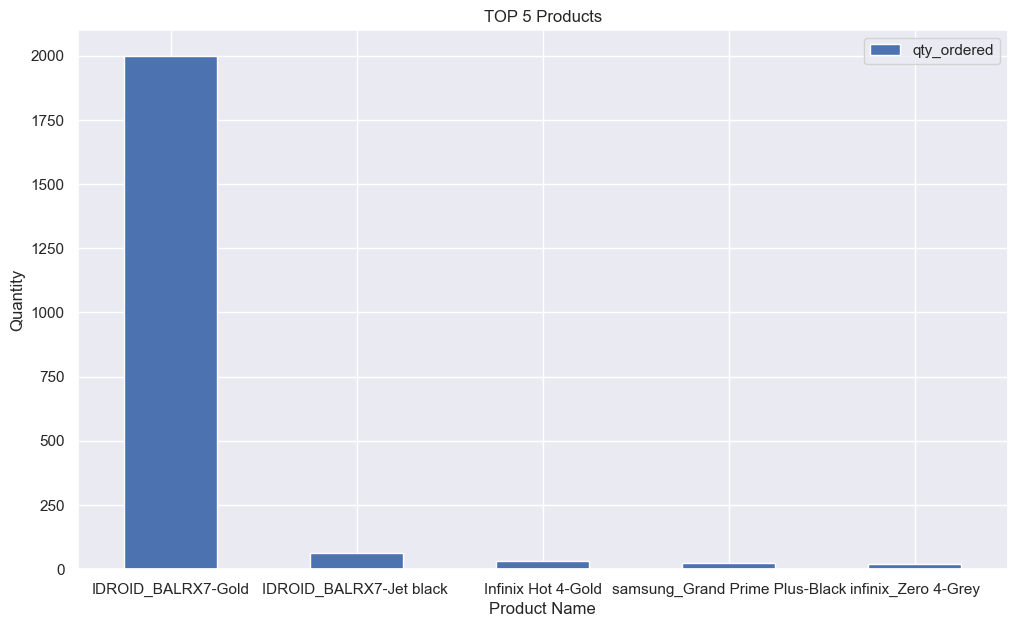

In [48]:
# show the chart
import seaborn as sns
# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='bar',
           grid = True,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

<Axes: title={'center': 'TOP 5 Products'}, xlabel='Quantity', ylabel='Product Name'>

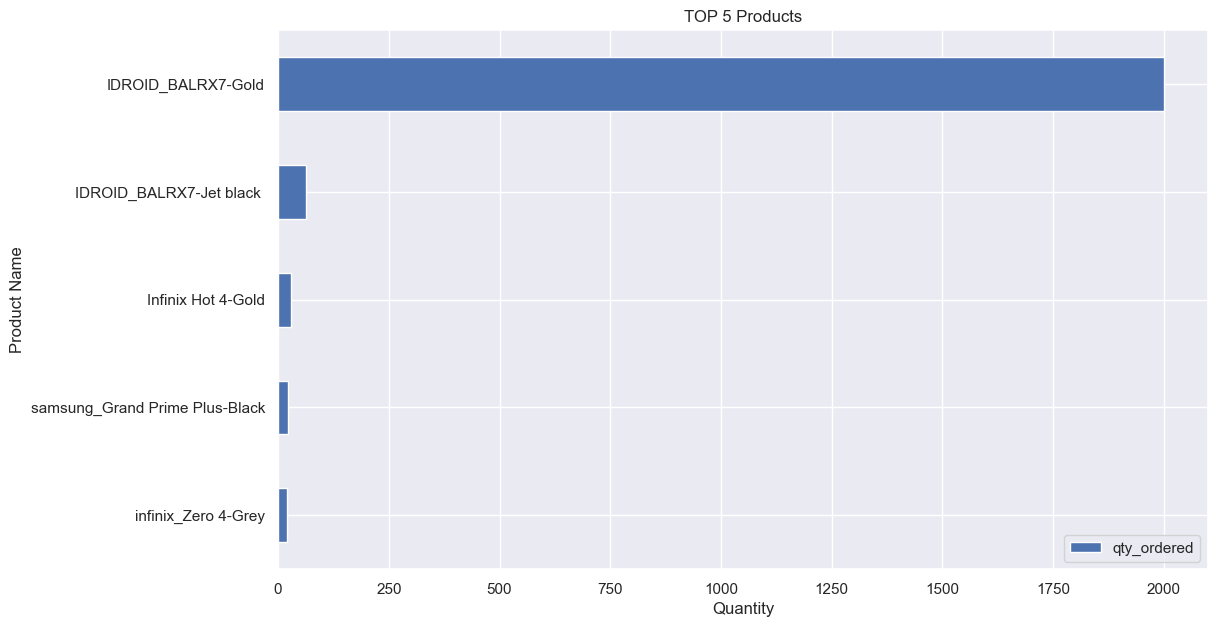

In [49]:
# show the chart
# change sort to ascending to show the highest from top to bottow on horizontal bar chart
top_5_prod.sort_values(by='qty_ordered', ascending=True, inplace=True)

# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='barh', # barh for horizontal bar chart
           grid = True,
           xlabel = 'Quantity',
           ylabel = 'Product Name',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

In [50]:
# Answer 2.1
# Create dataframe of all category, year 2021, aggregated by qty_ordered (sum)
cat_data_2021 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2021)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# Create dataframe of all category, year 2022, aggregated by qty_ordered (sum)
cat_data_2022 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# join those 2 dataframes
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='category')

# show
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,248,292
1,Beauty & Grooming,328,304
2,Books,342,390
3,Computing,218,302
4,Entertainment,146,298
5,Health & Sports,336,394
6,Home & Living,378,498
7,Kids & Baby,332,448
8,Men Fashion,470,346
9,Mobiles & Tablets,214,2306


In [51]:
# add new column named 'qty_growth' 
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

# add new column name 'growth_percentage'
cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth'] / x['qty_ordered_2021'] * 100),2))

# add new column 'remark' in order to classify the 'qty_growth' using a function to calculate
def updown_check(delta):
  if delta < 0:
    return 'DOWN'
  elif delta == 0:
    return 'FAIR'
  else:
    return 'UP'

# add new column 'remark'
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updown_check)

# sort from the smallest to largest on column qty_growth and reset the index
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# show the data
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,844,508,-336,-39.81,DOWN
1,Soghaat,1506,1214,-292,-19.39,DOWN
2,Men Fashion,470,346,-124,-26.38,DOWN
3,Beauty & Grooming,328,304,-24,-7.32,DOWN
4,Appliances,248,292,44,17.74,UP
5,Books,342,390,48,14.04,UP
6,Health & Sports,336,394,58,17.26,UP
7,Computing,218,302,84,38.53,UP
8,School & Education,364,470,106,29.12,UP
9,Kids & Baby,332,448,116,34.94,UP


Text(0.5, 0, 'Quantity')

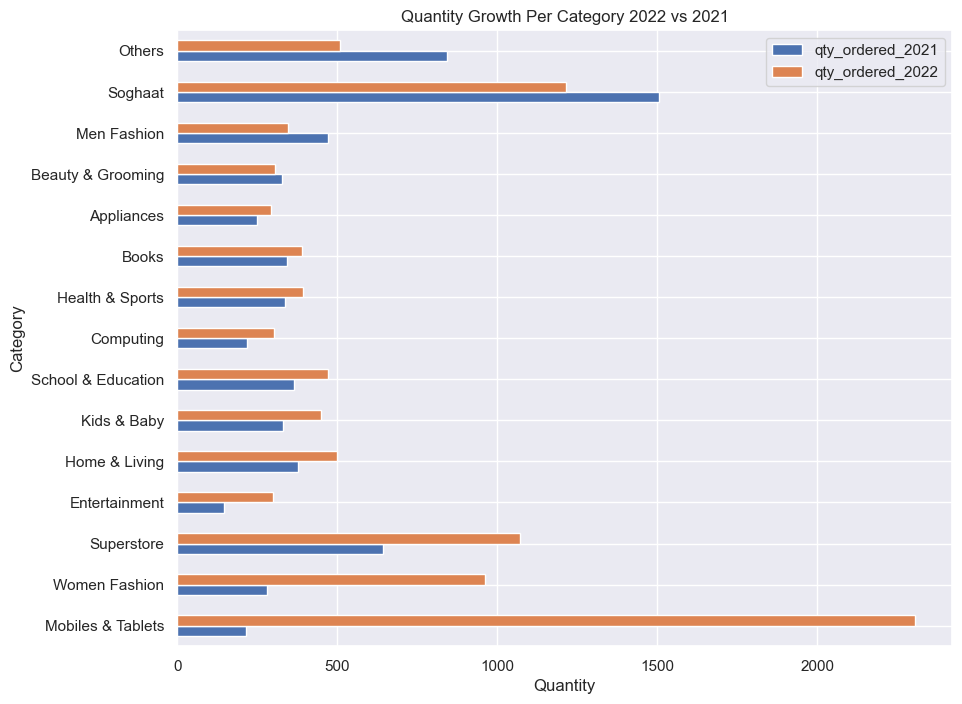

In [52]:
import matplotlib.pyplot as plt
# sort before plot
cat_data_2021_2022.sort_values(by='qty_growth', ascending=False, inplace=True)

# plot to show qty_ordered_2021 and qty_ordered_2022, horizontal bar
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['qty_ordered_2021','qty_ordered_2022'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Quantity Growth Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

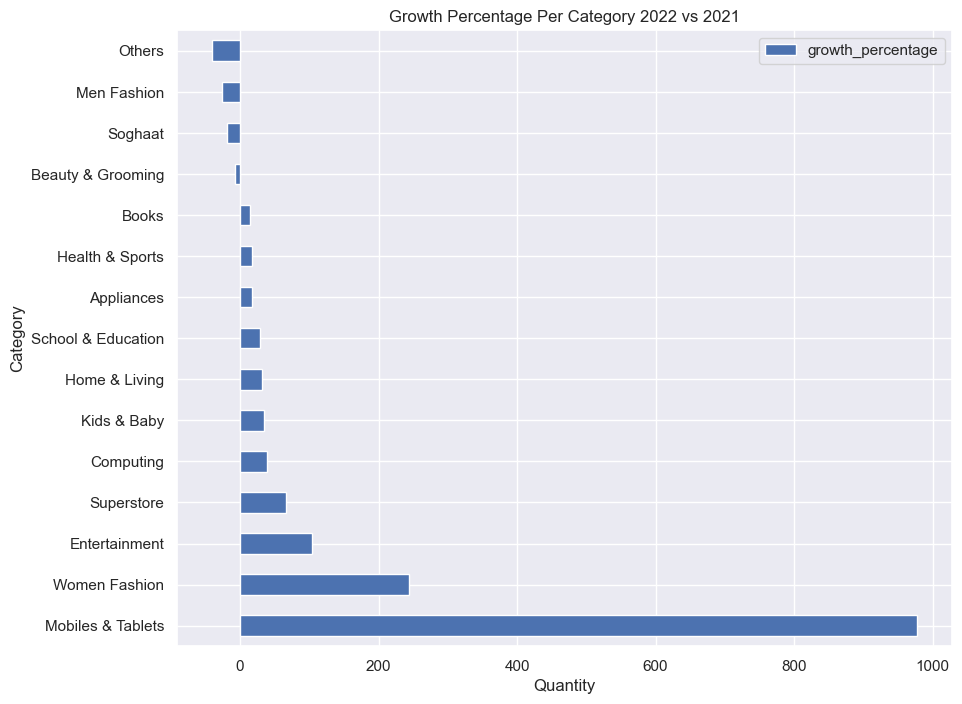

In [53]:
# sort before plot
cat_data_2021_2022.sort_values(by='growth_percentage', ascending=False, inplace=True)

# show growth_percentage
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['growth_percentage'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Growth Percentage Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

In [54]:
# Answer 2.2

# Create dataframe with filter category = Others, year of 2022, is_valid = 1
# Aggregate qty_ordered (sum)
others_2022 = pd.DataFrame(\
                           # filter 2022
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2022)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# Create dataframe with filter category = Others, year of 2021, is_valid = 1
# Aggregate qty_ordered (sum)
others_2021 = pd.DataFrame(\
                           # filter 2021
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2021)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# JOIN the dataframes
others_2021_2022 = others_2021.merge(others_2022[['sku_name', 'qty_ordered_2022']], how='outer', on='sku_name')

# show the data
others_2021_2022


,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,2.0
1,Aladdin_Wrench_Snap N Grip_01,Others,2.0,NaN
2,Aladdin_bike_cover,Others,6.0,4.0
3,Alerashine_sku-09-XL,NaN,NaN,2.0
4,Am-PTV_ATS-004-M,Others,10.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,2.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,2.0
159,test-product-00,NaN,NaN,2.0
160,tucano_IPD7AN-BK,Others,2.0,NaN


In [55]:
# fill "NaN" with "Others" in column "category"
others_2021_2022['category'].fillna('Others', inplace=True)

# fill the rest "NaN" with 0
others_2021_2022.fillna(0, inplace=True)

# show the data
others_2021_2022

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\3842611649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  others_2021_2022['category'].fillna('Others', inplace=True)


,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,2.0
1,Aladdin_Wrench_Snap N Grip_01,Others,2.0,0.0
2,Aladdin_bike_cover,Others,6.0,4.0
3,Alerashine_sku-09-XL,Others,0.0,2.0
4,Am-PTV_ATS-004-M,Others,10.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,2.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,2.0
159,test-product-00,Others,0.0,2.0
160,tucano_IPD7AN-BK,Others,2.0,0.0


In [56]:
# add column delta_2022_2021
others_2021_2022['delta_2022_2021'] = others_2021_2022['qty_ordered_2022'] - others_2021_2022['qty_ordered_2021']

# add column remark using function "updown_check"
others_2021_2022['remark'] = others_2021_2022['delta_2022_2021'].apply(updown_check)

# sort_values from the smallest to largest
others_2021_2022.sort_values(by='delta_2022_2021', ascending=True, inplace=True)

# reset the index
others_2021_2022.reset_index(drop=True, inplace=True)

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,remark
0,RB_Dettol Germ Busting Kit-bf,Others,400.0,80.0,-320.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,46.0,0.0,-46.0,DOWN
2,Telemall_MM-DR-HB-L,Others,46.0,4.0,-42.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,40.0,0.0,-40.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,26.0,0.0,-26.0,DOWN
...,...,...,...,...,...,...
157,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,14.0,14.0,UP
158,TCF_Educate-a-Child-for-a-Month,Others,0.0,16.0,16.0,UP
159,shoppers stop_MagicGlass-3,Others,0.0,26.0,26.0,UP
160,SKMT_Medicine,Others,0.0,40.0,40.0,UP


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4252\1013559605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)


Text(0.5, 0, 'Delta 2022_2021')

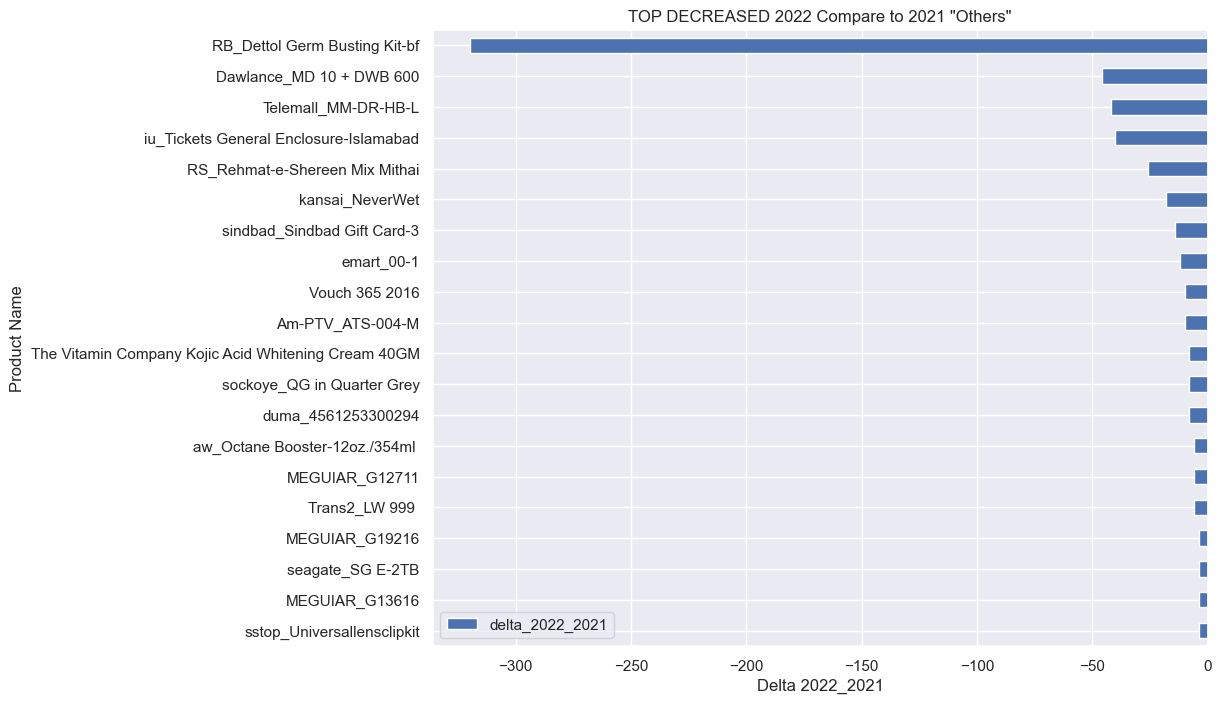

In [57]:
# choose 20 products to show (from the smallest)
others_2021_2022 = others_2021_2022.head(20)
others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)

# plot
sns.set()
others_2021_2022.plot(x='sku_name',\
                      y='delta_2022_2021',\
                      kind='barh',\
                      figsize=(10, 8))
plt.title('TOP DECREASED 2022 Compare to 2021 "Others"')
plt.ylabel('Product Name')
plt.xlabel('Delta 2022_2021')

In [58]:
# define dataframe with filter as requested
cs_gross_data = df.loc[:,['customer_id', 'registered_date']][(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year == 2022)]

# show the data
cs_gross_data

,customer_id,registered_date
0,C993531L,2021-11-08
1,C993531L,2021-11-08
16,C652751L,2022-07-19
17,C652751L,2022-07-19
38,C189144L,2022-07-01
...,...,...
11485,C744990L,2022-05-21
11512,C317976L,2021-11-26
11513,C317976L,2021-11-26
11514,C417245L,2022-07-26


In [59]:
# Validation
# compare unique customer_id from the dataframe with count of dataframe index
# use function
def check_customerid(x):
  unique_customerid = len(x['customer_id'].unique().tolist())
  rows_count = len(x.index)
  return [unique_customerid,rows_count]

# run validation 
test = check_customerid(cs_gross_data)
print('Data Before : ', test)

Data Before :  [820, 2046]


In [60]:
# Validation
# compare unique customer_id from the dataframe with count of dataframe index
# use function
def check_customerid(x):
  unique_customerid = len(x['customer_id'].unique().tolist())
  rows_count = len(x.index)
  return [unique_customerid,rows_count]

# run validation 
test = check_customerid(cs_gross_data)
print('Data Before : ', test)

Data Before :  [820, 2046]


In [61]:
# add column month_id, month_name, day_name, year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

In [62]:
# Create dataframe for weekends data October-December 2022
data_weekends = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekends')\
                             .sort_values(by='month_id', ascending=True)
                             )

# Create dataframe for weekdays data October-December 2022
data_weekdays = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekdays')\
                             .sort_values(by='month_id', ascending=True)
                             )

# merge the dataframe
data_weekdays_weekends = data_weekdays.merge(data_weekends)

# show the data
data_weekdays_weekends

,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekends
0,10,October,2022,885671.82,634260.0
1,11,November,2022,641861.93,607794.0
2,12,December,2022,813973.74,410599.4


<Axes: xlabel='Month Name', ylabel='Average Sales'>

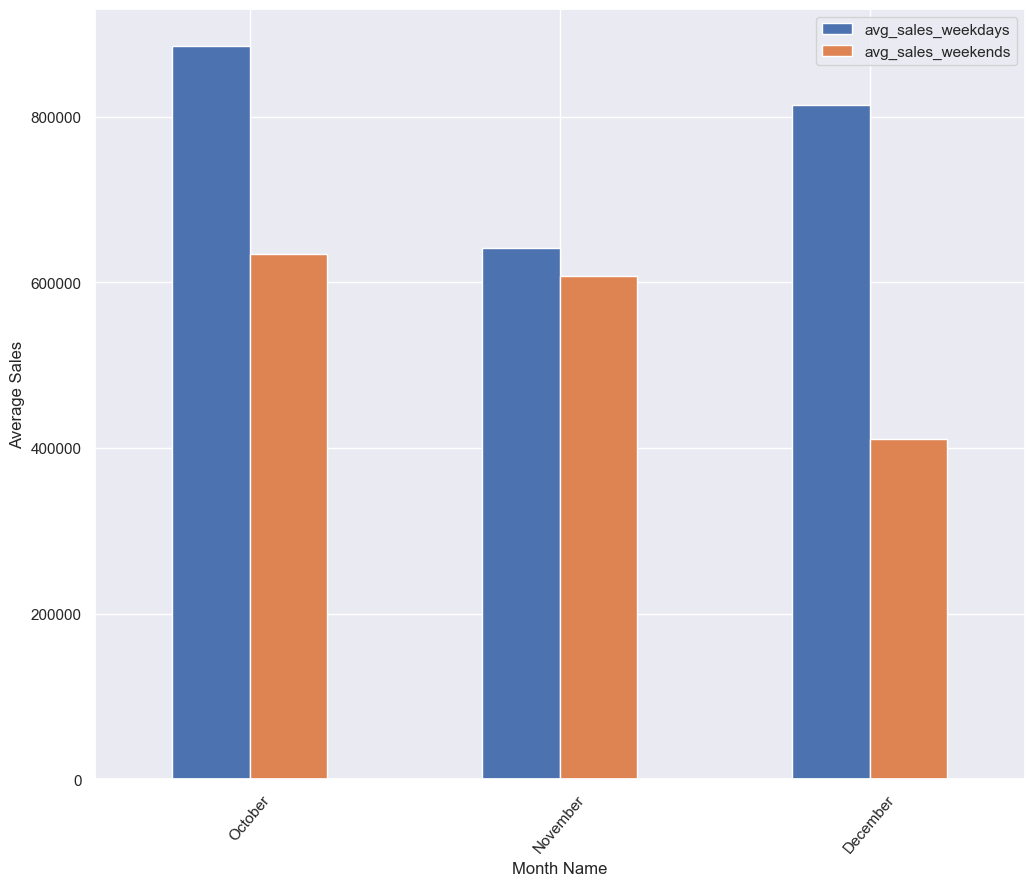

In [63]:
# plot the data
sns.set()
data_weekdays_weekends.plot(x='month_name',
                            y=['avg_sales_weekdays','avg_sales_weekends'],
                            kind='bar',
                            grid = True,
                            xlabel = 'Month Name',
                            ylabel = 'Average Sales',
                            figsize=(12,10),
                            rot = 50,  # for rotate the text in xlabel
                            table = False,
                            secondary_y = False)

In [64]:
# Answer No 4.2

# Filter dataframe df for weekends, October-December 2022
data_weekends_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Filter dataframe df for weekdays, October-December 2022
data_weekdays_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Create dictionary
all_month_avg_compare = {\
                        'Period':'Total 3 months',\
                        'Avg Weekdays Sales': round(data_weekdays_all['before_discount'].mean(),2),\
                        'Avg Weekends Sales': round(data_weekends_all['before_discount'].mean(),2),\
                        'Diff (Value)': round(data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean(),2),\
                        'Diff (%)': pd.Series(round(((data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean())/data_weekends_all['before_discount'].mean())*100,2), dtype=str)+'%'
                        }

# create dataframe from dictionary
compare_avg_weekends_weekdays = pd.DataFrame(data=all_month_avg_compare, index=[0])

# show the data
compare_avg_weekends_weekdays

,Period,Avg Weekdays Sales,Avg Weekends Sales,Diff (Value),Diff (%)
0,Total 3 months,772341.0,558865.06,-213475.94,-38.2%


<Axes: xlabel='Period', ylabel='Average Sales'>

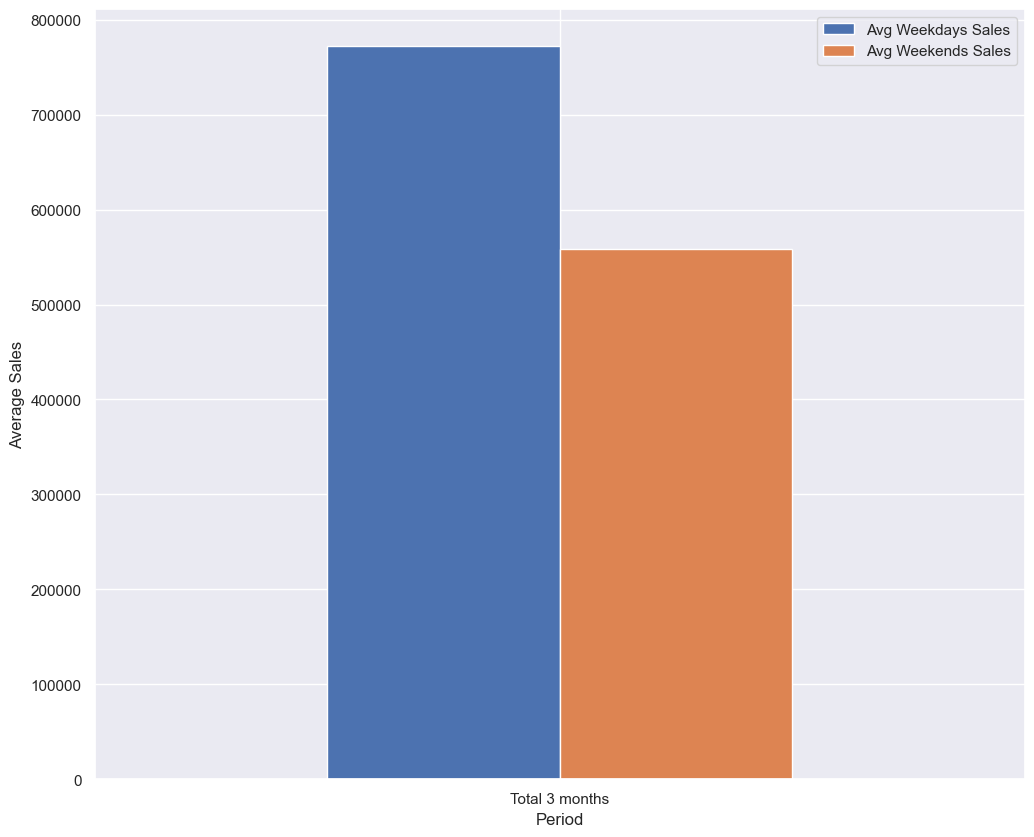

In [65]:
# plot the data
sns.set()
compare_avg_weekends_weekdays.plot(x='Period',
                                  y=['Avg Weekdays Sales','Avg Weekends Sales'],
                                  kind='bar',
                                  grid = True,
                                  # xlabel = 'Month Name',
                                  ylabel = 'Average Sales',
                                  figsize=(12,10),
                                  rot = 0,  # for rotate the text in xlabel
                                  table = False,
                                  secondary_y = False)

In [66]:
# Specify the file path and name
file_path = r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\finaldataset.csv" # Update with your desired folder path

# Save to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\finaldataset.csv


In [175]:
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\finaldataset.csv")

In [179]:
df

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,sku_name,base_price,cogs,category,registered_date,payment_method,month_id,month_name,day_name,year
0,ODR1111336599a,C993531L,23 February 2022,P569750,62002,1,62002.0,0.0,62002.0,1,...,emart_Magic Hose Pipe 75 Ft,61654.0,51156,Home & Living,08 November 2021,jazzwallet,2,February,Wednesday,2022
1,ODR1116457650x,C517907L,08 October 2022,P320550,159500,1,159500.0,0.0,159500.0,1,...,sheraton_FMOTORS_01,159500.0,97266,Health & Sports,15 August 2022,cod,10,October,Saturday,2022
2,ODR1119282607l,C192625L,07 August 2021,P146984,919300,1,919300.0,0.0,919300.0,1,...,tcl_ 24 inch D2720 HD Ready LED TV,919300.0,671060,Entertainment,27 July 2021,ublcreditcard,8,August,Saturday,2021
3,ODR1119964698b,C225180L,11 August 2021,P523149,59856,1,59856.0,0.0,59856.0,1,...,phub_Hope by Rasasi 75ml EDP,59856.0,53824,Beauty & Grooming,11 October 2021,cod,8,August,Wednesday,2021
4,ODR1120310291y,C708473L,18 September 2021,P692619,34510,1,34510.0,0.0,34510.0,1,...,Progressive_9781474813860,34510.0,29290,Books,02 July 2021,cod,9,September,Saturday,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,ODR9993915541n,C722375L,23 July 2022,P622895,77720,1,77720.0,0.0,77720.0,1,...,Rajesh_RAJ0392,77720.0,59798,Computing,02 July 2021,cod,7,July,Saturday,2022
5760,ODR9994037511p,C454055L,13 July 2022,P900623,57768,1,57768.0,0.0,57768.0,1,...,Z&A_ZEES-0122,57768.0,36366,Others,13 May 2022,cod,7,July,Wednesday,2022
5761,ODR9994693048r,C781213L,10 April 2021,P277058,5074942,1,5074940.0,0.0,5074940.0,1,...,Apple iPhone 6S Plus 16GB,5596940.0,4365600,Mobiles & Tablets,23 August 2021,Payaxis,4,April,Saturday,2021
5762,ODR9995077663x,C351295L,25 July 2021,P136796,400200,1,400200.0,0.0,400200.0,1,...,nabila_NTICE FOR Almond,261000.0,161820,Beauty & Grooming,04 July 2021,cod,7,July,Sunday,2021


In [181]:
sales_2021 = df[df['year'] == 2021].groupby('sku_name')['qty_ordered'].sum().rename('sales_2021')
sales_2022 = df[df['year'] == 2022].groupby('sku_name')['qty_ordered'].sum().rename('sales_2022')

In [183]:
sales_comparison = pd.concat([sales_2021, sales_2022], axis=1).fillna(0)

In [185]:
sales_comparison['sales_diff'] = sales_comparison['sales_2022'] - sales_comparison['sales_2021']

In [187]:
top_decreases = sales_comparison.sort_values(by='sales_diff').head(10)

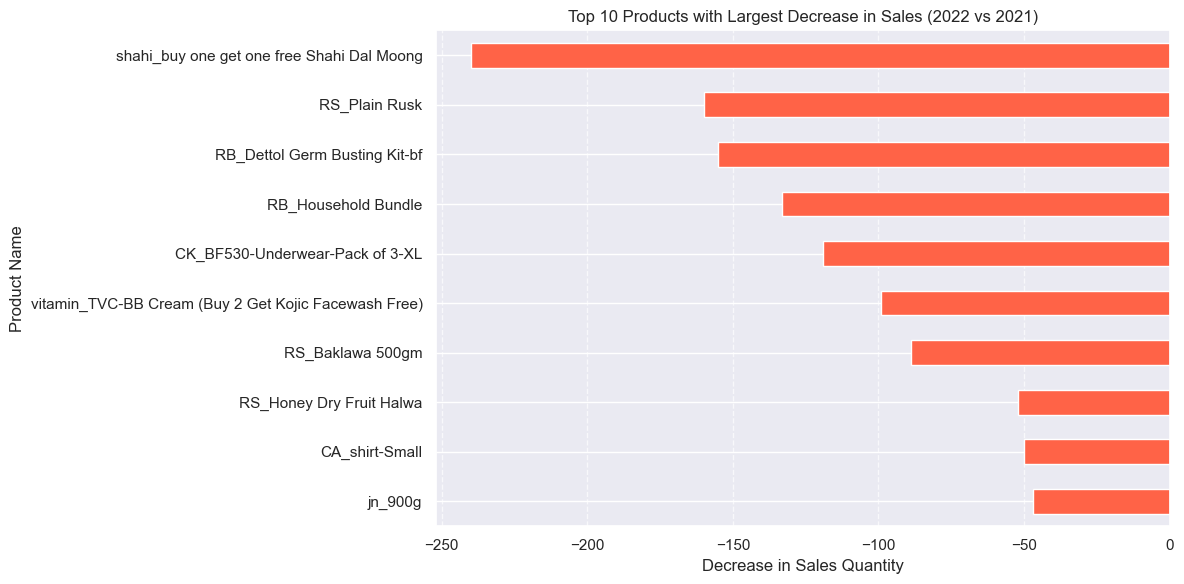

In [189]:
plt.figure(figsize=(12, 6))
top_decreases['sales_diff'].plot(kind='barh', color='tomato')
plt.title('Top 10 Products with Largest Decrease in Sales (2022 vs 2021)')
plt.xlabel('Decrease in Sales Quantity')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [191]:
top_decreases.reset_index()

,sku_name,sales_2021,sales_2022,sales_diff
0,shahi_buy one get one free Shahi Dal Moong,240.0,0.0,-240.0
1,RS_Plain Rusk,160.0,0.0,-160.0
2,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
3,RB_Household Bundle,133.0,0.0,-133.0
4,CK_BF530-Underwear-Pack of 3-XL,119.0,0.0,-119.0
5,vitamin_TVC-BB Cream (Buy 2 Get Kojic Facewash...,99.0,0.0,-99.0
6,RS_Baklawa 500gm,107.0,18.0,-89.0
7,RS_Honey Dry Fruit Halwa,52.0,0.0,-52.0
8,CA_shirt-Small,50.0,0.0,-50.0
9,jn_900g,57.0,10.0,-47.0


📊 Average days to first order: 55.48


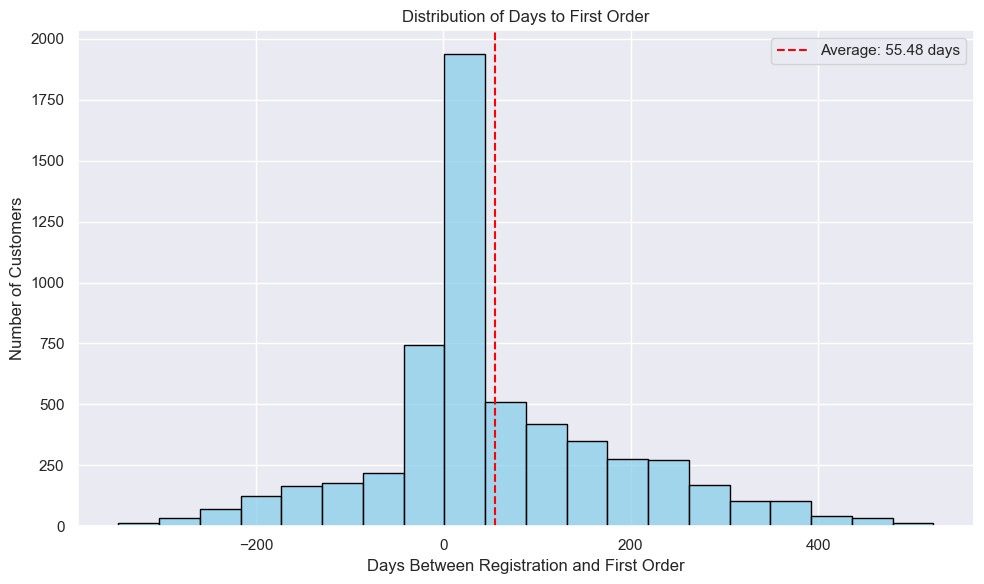

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\BHAVYA WORK\PROJECTS\finaldataset.csv", parse_dates=['registered_date', 'order_date'])

# Step 1: Calculate Days to First Order
df['days_to_order'] = (df['order_date'] - df['registered_date']).dt.days

# Step 2: Calculate Average Days
average_days = df['days_to_order'].mean()
print(f"📊 Average days to first order: {average_days:.2f}")

# Step 3: Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['days_to_order'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Days to First Order')
plt.xlabel('Days Between Registration and First Order')
plt.ylabel('Number of Customers')
plt.axvline(average_days, color='red', linestyle='--', label=f'Average: {average_days:.2f} days')
plt.legend()
plt.tight_layout()
plt.show()